## 航空宇宙情報システム学第二

<h1><center> 第4回 Pandasの紹介 </center> </h1>

<center>

2023年5月2日

担当教員: 矢入健久

e-mail: yairi@g.ecc.u-tokyo.ac.jp
</center>


# はじめに

今年は祝日のめぐり合わせが良くなくて、今日は大型連休の合間の授業になってしまいましたが、めげずにやっていきましょう。
前回は、前々回の行列・ベクトルの残りだけで大部分の時間を使ってしまい、Scipyについては、行列指数関数`expm()`の紹介だけで終わってしまいました。

今回は、まず、[前回のノートブック](https://colab.research.google.com/drive/1GB6zbykCUn7-P2fyM5YFvp9sv0nVndHn?usp=sharing)を使ってScipyの常微分方程式ソルバー(`solve_ivp()`関数)と、Matplotlibを紹介した後、このノートブックで、データ操作ライブラリPandasの紹介を行いたいと思います。前回のノートブックにもPandasのことが書かれていますが、不十分なところがあるので手直ししました。

# Pandas によるデータ操作

## CSVファイルからデータフレームへの読み込み

初回に、CSVファイルからデータを読み込む基本的な方法を紹介しましたが、現在、Pythonでデータ処理を行う場合は、Pandasと呼ばれるライブラリを使うのがド定番です。これも非常に高機能なので完全に使いこなすには訓練が必要ですが、一番重要なのは、<font color="blue">データフレーム(data frame)</font>という構造です。データフレームは行と列から成る２次元じょうのテーブルで、例えばExcelシートのようなスプレッドシートをイメージすると良いと思います。

まず、Pandasを使うには、他のモジュール・ライブラリと同様にまずインポートする必要がありますが、
```
import pandas as pd
```
のように、`pandas`(5文字)を`pd`(2文字)に短縮して使うのが慣習となっています。

とりあえず、前々回に使った東京の天気データ(`weather_tokyo_1980_2023.csv`)をPandasのデータフレームに読み込んでみましょう。Pandasには、CSVファイルを読み込むための関数`read_csv()`が用意されています。
<font color="red">Googleドライブをマウントした上で</font>、CSVファイルに含まれているデータをデータフレームに読み込むために、以下のコードを実行します。
```
df = pd.read_csv("drive/My Drive/weather_tokyo_1980_2023.csv",index_col=0,parse_dates=True)
```

もっとシンプルに、
```
df = pd.read_csv("drive/My Drive/weather_tokyo_1980_2023.csv")
```
でも読み込めるのですが、このデータの場合、先頭列に`1980/6/1`のような年月日が順番に並んでおり、かつ、他の行はその年月日の気象情報が羅列されているので、`index_col=0,parse_dates=True`というオプション引数を与えて、明示的に<font color="blue">先頭行を年月日として扱うようにしています。</font> このようにしてデータを読み込むことのメリットについては後で述べます。


In [ ]:
import pandas as pd
df = pd.read_csv("drive/My Drive/weather_tokyo_1980_2023.csv",index_col=0,parse_dates=True)

これで、CSVファイルから全てのデータが、`df`という変数名が付けられたデータフレーム(オブジェクト)に読み込まれました。
`print()`関数でデータフレームの中身を覗くことができます。行数が非常に多いので、最初と最後の数行ずつが表示されるようになっています。

In [ ]:
print(df)

            temp_hi  temp_lo  rain   sun  wind  vapor  cloud
date                                                        
1980-06-01     25.0     18.7   0.0   1.1   1.7   20.1   10.0
1980-06-02     27.3     21.1  13.5   5.4   3.2   21.9   10.0
1980-06-03     28.3     20.4   2.0   5.7   2.4   22.3    9.0
1980-06-04     24.9     20.4   0.0   5.7   3.4   14.6    7.0
1980-06-05     27.2     19.4   0.0  11.0   2.2   16.5    5.3
...             ...      ...   ...   ...   ...    ...    ...
2023-04-03     18.4      9.5   0.0   8.4   2.9    8.3    3.8
2023-04-04     21.0      7.7   0.0  10.5   2.3    8.2    2.5
2023-04-05     21.8      9.8   0.0   6.3   4.0   10.5    8.8
2023-04-06     23.4     16.3   0.0   3.5   6.2   14.5    6.8
2023-04-07     21.3     17.0  11.5   0.2   6.4   18.0    9.0

[15651 rows x 7 columns]


なお、`print()`関数の代わりに、`display()`関数を使うか、あるいは、もっと簡単に
```
df
```
のようにデータフレーム名を直接コードセル(の最後)で実行すると、少しだけ見やすく書式化されて表示されます。

In [ ]:
display(df)

,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
1980-06-01,25.0,18.7,0.0,1.1,1.7,20.1,10.0
1980-06-02,27.3,21.1,13.5,5.4,3.2,21.9,10.0
1980-06-03,28.3,20.4,2.0,5.7,2.4,22.3,9.0
1980-06-04,24.9,20.4,0.0,5.7,3.4,14.6,7.0
1980-06-05,27.2,19.4,0.0,11.0,2.2,16.5,5.3
...,...,...,...,...,...,...,...
2023-04-03,18.4,9.5,0.0,8.4,2.9,8.3,3.8
2023-04-04,21.0,7.7,0.0,10.5,2.3,8.2,2.5
2023-04-05,21.8,9.8,0.0,6.3,4.0,10.5,8.8


いずれにせよ、このデータがテーブル状（スプレッドシート状）になっていて、きちんとヘッダー行、日時列が認識されていることが分かります。

ちなみに、データフレームの`head()`メソッド、`tail()`メソッドを使って、「最初のn行を表示する」「最後のn行を表示する」というようなことも簡単にできます。

In [ ]:
# 最後の10行を表示
display(df.tail(10))

,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
2023-03-29,18.6,8.3,15.5,3.7,2.2,10.4,6.0
2023-03-30,19.7,10.1,0.5,5.8,2.4,11.9,6.5
2023-03-31,20.1,10.4,0.0,4.6,2.6,12.2,6.3
2023-04-01,23.3,10.3,0.0,10.6,2.6,11.2,2.3
2023-04-02,19.0,11.1,0.0,2.0,3.2,10.7,9.8
2023-04-03,18.4,9.5,0.0,8.4,2.9,8.3,3.8
2023-04-04,21.0,7.7,0.0,10.5,2.3,8.2,2.5
2023-04-05,21.8,9.8,0.0,6.3,4.0,10.5,8.8
2023-04-06,23.4,16.3,0.0,3.5,6.2,14.5,6.8


また、データフレームの`describe()`メソッドを使うと、各列についての基本統計値(要素数, 平均, 標準偏差, 最小値, 最大値, 25,50,75各パーセンタイル点)を表示してくれるので、データの分布がどうなっているのかをざっくりと見るのに便利です。

In [ ]:
df.describe()

,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
count,15651.000000,15650.000000,15651.000000,15651.000000,15628.000000,15651.000000,15651.000000
mean,20.229544,12.965936,4.289981,5.322069,3.196129,13.703150,6.554942
std,7.958852,8.102258,13.152824,4.030873,1.064400,8.190132,3.310700
min,0.700000,-4.000000,0.000000,0.000000,0.800000,1.700000,0.000000
25%,13.200000,5.400000,0.000000,0.900000,2.400000,6.300000,4.000000
50%,20.500000,13.200000,0.000000,5.700000,3.000000,12.100000,7.500000
75%,26.500000,19.800000,1.500000,8.900000,3.700000,20.300000,9.800000
max,39.500000,30.400000,259.500000,13.800000,9.100000,34.500000,10.000000


## データフレームの列と行

Pandasのデータフレームは、行と列から成るテーブル状のデータを表現するという点では、NumPyのarray型と良く似ています。実際、データフレームオブジェクトををarray型オブジェクトに変換すること、およびその逆の変換を行う方法が存在します。

その一方で、<font color="red">NumPyのarray型は行も列も整数のインデクス（すなわち、行番号・列番号）しか使うことができない</font>（例えば、array型による行列`A`の$(i,j)$成分は、`A[i,j]`として参照・アクセスしました）のに対して、<font color="blue">Pandasのデータフレームでは、行番号・列番号以外に、行・列それぞれに名前（ラベル）を付けてそれを利用することができます。特に、行の名前のことをPandasでは狭義に「インデクス」と呼びます</font>。

<font color="red">データに行や列を新たに追加したり、逆に削除したりすると、行・列の番号は変更されてしまいますが、</font> <font color="blue">各行・列に名前（ラベル）でついていればそれらば変更されません。</font>
（転校生が入ってきたり出ていったりすると、出席番号が変更になってしまう学生がいますが、その人の名前自体は変わらない、ということと同じ？です。）


まず、先程`df`に読み込んだデータフレームの「列名のリスト」は、`columns`属性として参照することができます。(厳密には「リスト」ではありませんが、まあ似たようなものだと思って大丈夫です。)
```
df.columns
```

また、このデータを`read_csv()`関数で読み込むときに、`index_col=0,parse_dates=True`というオプション引数を与えたため、もとのCSVファイルの先頭列であった日付(date)の列がこのデータフレームのインデクス列として利用され、各行の名前（これをpandasのデータフレームではインデクスと呼ぶ）のリスト（これも厳密にはリストではありません。）は、
```
df.index
```
で得ることができます。（このデータの場合、15000行以上あるので、最初と最後の10個ずつしか表示されません。）

In [ ]:
# 列名のリスト(正確には、pandasのindexオブジェクト)
print(df.columns)
# リスト型に型変換して表示
print(list(df.columns))

Index(['temp_hi', 'temp_lo', 'rain', 'sun', 'wind', 'vapor', 'cloud'], dtype='object')
['temp_hi', 'temp_lo', 'rain', 'sun', 'wind', 'vapor', 'cloud']


In [ ]:
# 行名（インデクス）のリスト(正確には、pandasのindexオブジェクト)
print(df.index)

DatetimeIndex(['1980-06-01', '1980-06-02', '1980-06-03', '1980-06-04',
               '1980-06-05', '1980-06-06', '1980-06-07', '1980-06-08',
               '1980-06-09', '1980-06-10',
               ...
               '2023-03-29', '2023-03-30', '2023-03-31', '2023-04-01',
               '2023-04-02', '2023-04-03', '2023-04-04', '2023-04-05',
               '2023-04-06', '2023-04-07'],
              dtype='datetime64[ns]', name='date', length=15651, freq=None)


## 列データの参照・抽出

まず、データフレームから<font color="blue">列の名前(ラベル)を使って特定の1列</font>を取り出す方法について紹介します。一般的なのは次の2つの方法です。
1. `df["列名"]` : 辞書型的に列を参照する方法
1. `df.列名` : クラスオブジェクト的に列を参照する方法

In [ ]:
# 雨量('rain')の列だけを取り出す。辞書型ライクな方法
df['rain'] # df.rain も可

date
1980-06-01     0.0
1980-06-02    13.5
1980-06-03     2.0
1980-06-04     0.0
1980-06-05     0.0
              ... 
2023-04-03     0.0
2023-04-04     0.0
2023-04-05     0.0
2023-04-06     0.0
2023-04-07    11.5
Name: rain, Length: 15651, dtype: float64

In [ ]:
df.rain

date
1980-06-01     0.0
1980-06-02    13.5
1980-06-03     2.0
1980-06-04     0.0
1980-06-05     0.0
              ... 
2023-04-03     0.0
2023-04-04     0.0
2023-04-05     0.0
2023-04-06     0.0
2023-04-07    11.5
Name: rain, Length: 15651, dtype: float64

In [ ]:
# 日照時間('sun')の列だけを取り出す。クラスオブジェクトライクな方法
df.sun # df["sun"]も可

date
1980-06-01     1.1
1980-06-02     5.4
1980-06-03     5.7
1980-06-04     5.7
1980-06-05    11.0
              ... 
2023-04-03     8.4
2023-04-04    10.5
2023-04-05     6.3
2023-04-06     3.5
2023-04-07     0.2
Name: sun, Length: 15651, dtype: float64

次に、複数の列を名前で取り出す場合です。この場合は、取り出す列の名前をリストにしてdf[]に与えます。 例えば、temp_hi列とtemp_lo列を一緒に取り出すには、
```
df[["temp_hi","temp_lo"]]
```
のようにします。タプルではなく<font color="red">リストで与えるので、大かっこが二重[[]]になっている</font>点に注意してください。

In [ ]:
df[['temp_hi','temp_lo']]

,temp_hi,temp_lo
date,,
1980-06-01,25.0,18.7
1980-06-02,27.3,21.1
1980-06-03,28.3,20.4
1980-06-04,24.9,20.4
1980-06-05,27.2,19.4
...,...,...
2023-04-03,18.4,9.5
2023-04-04,21.0,7.7
2023-04-05,21.8,9.8


なお、<font color="red">列名で取り出すときには、スライスが使えない</font>ことにも注意しましょう。
例えば、`temp_lo`列から`rain`列までを取り出そうとして次のように書くとエラーになります。
```
df[["temp_lo":"rain"]] #NG,エラー
```

<font color="blue">複数の列をスライスで取り出したいときは、データフレームの`iloc`属性と、列番号のスライスを使う。</font> 例えば、データフレーム`df`の<font color="red">2列目から4列目まで</font>を取り出す場合は、
```
df.iloc[:,2:5]
```
のようにします。ここで、`[]`の中の最初の`:,`は、行については全行を選択することを意味している。`iloc`属性はまた後で出てきます。

In [ ]:
# 2列目(rain)から4列目(wind)までを参照。3列目(sun)も含まれる。
df.iloc[:,2:5]

,rain,sun,wind
date,,,
1980-06-01,0.0,1.1,1.7
1980-06-02,13.5,5.4,3.2
1980-06-03,2.0,5.7,2.4
1980-06-04,0.0,5.7,3.4
1980-06-05,0.0,11.0,2.2
...,...,...,...
2023-04-03,0.0,8.4,2.9
2023-04-04,0.0,10.5,2.3
2023-04-05,0.0,6.3,4.0


## 行データの参照・抽出

まず、<font color="blue">データフレームから特定の1行だけをインデクス(行ラベル)を使って取り出したい場合</font>から見てみます。

古いPandasの参考書やサイトを見ると、時々、<font color="red">`df[インデクス]`で行を取り出せるというようなことが書かれていますが、少なくとも現在はこれはできません。</font>

ではどうするか、というと、
<font color="blue">インデクス(行名)を使って1行だけ取り出す場合は、データフレームの`loc`属性を使います</font>。例えば、2007年1月24日の行を参照するには、
```
df.loc["20070124"]
```
のようにします。`[]`の中で列についてもスライスを使って、
```
df.loc["20070124",:]
```
としても同じ結果が得られますが、少し手間が増えます。

In [ ]:
# loc属性を使う
print(df.loc[["20070124"]])
# これでも同じ
display(df.loc[["20070124"],:])
# df["20070124"] ## これはNG

            temp_hi  temp_lo  rain  sun  wind  vapor  cloud
date                                                       
2007-01-24     10.5      5.5   0.0  2.6   2.7    3.6    5.5


,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
2007-01-24,10.5,5.5,0.0,2.6,2.7,3.6,5.5


ちなみに、この天気データのように、インデクスが日付(年月日)になっている場合、上のように、"YYYYMMDD"の形式文字列以外にも、"YYYY-MM-DD","YYYY/MM/DD" とか、一般的な日付の表記も認識してもらえます。

In [ ]:
print(df.loc["2021-4-1"])
print(df.loc["2022/08/30"])
print(df.loc["2023 Jan 3"])

temp_hi    21.7
temp_lo    13.6
rain        0.0
sun         6.5
wind        2.8
vapor      11.4
cloud       7.8
Name: 2021-04-01 00:00:00, dtype: float64
temp_hi    26.2
temp_lo    20.2
rain        5.0
sun         0.0
wind        1.9
vapor      24.5
cloud      10.0
Name: 2022-08-30 00:00:00, dtype: float64
temp_hi    11.0
temp_lo     0.5
rain        0.0
sun         8.9
wind        2.2
vapor       3.8
cloud       1.0
Name: 2023-01-03 00:00:00, dtype: float64


**(練習)** 自分が生まれた日の天気データを取り出して表示してみてください。

ここで、<font color="blue">日付(年月日)をインデクスとしてデータを読み込んだことのメリット<font>について少し考えてみます。

まず、<font color="blue">ある日から連続する数日間のデータを取り出したい場合、日時についてのスライスを使うことができます。</font>
例えば、2022年の4月1日からの1週間の天気情報は、
```
df.loc['2022-04-01':'2022-04-07']
```
で参照することができます。

In [ ]:
df.loc['2022-04-01':'2022-04-07']

,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
2022-04-01,12.4,3.9,16.5,5.2,3.2,6.3,9.8
2022-04-02,12.9,3.6,0.0,11.6,3.0,5.7,7.8
2022-04-03,10.1,6.6,13.5,0.0,2.6,9.2,10.0
2022-04-04,9.8,6.7,53.5,0.0,3.4,10.7,10.0
2022-04-05,17.9,8.2,1.5,3.1,2.8,11.4,9.5
2022-04-06,21.8,10.6,0.0,7.9,2.1,12.4,9.0
2022-04-07,19.2,10.9,0.0,6.2,2.9,11.6,7.8


実は、<font color="red">インデクスを使って連続する複数行を取り出す場合は、`loc`属性を介さず、データフレームの直後の`[]`の中でスライスを使うこともできます。</font> つまり、上の例は、次のように書いても良いということです。
```
df["2022-04-01":"2022-04-07"]
```


<font color="red">単独行は駄目だけど、スライスならデータフレーム名直後の`[]`に指定してOKというのはちょっと謎仕様</font>ですが、列の取り出しと混乱させないようにしつつ、できるだけ柔軟にデータを扱えるような仕様としてこうなっているのかもしれません。



In [ ]:
# 行インデクスのスライスは、次でもOK
df["20220401":"20220407"]

,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
2022-04-01,12.4,3.9,16.5,5.2,3.2,6.3,9.8
2022-04-02,12.9,3.6,0.0,11.6,3.0,5.7,7.8
2022-04-03,10.1,6.6,13.5,0.0,2.6,9.2,10.0
2022-04-04,9.8,6.7,53.5,0.0,3.4,10.7,10.0
2022-04-05,17.9,8.2,1.5,3.1,2.8,11.4,9.5
2022-04-06,21.8,10.6,0.0,7.9,2.1,12.4,9.0
2022-04-07,19.2,10.9,0.0,6.2,2.9,11.6,7.8


`loc`属性を使った場合に戻りますが、
<font color="blue">ある月の最初の日から最後の日までの行データは、`df.iloc['YYYY-MM']` などの形式で取り出すことができます</font>。例えば、2022年の5月のデータは、
```
df.loc['2022-05'] # df.loc['2022-5']でも可
```
で丸ごと参照することができます。これと、後で出てくる`mean()`メソッドなどを組み合わせれば、月ごとの平均気温を簡単に求めることができます。


In [ ]:
# まず、2022年5月の1ヶ月分のデータをそのまま表示
display(df.loc['2022-5']) # df.loc["2022 May"] も良いが、df.loc["202205"]はなぜかNG
# その月の各列の平均を表示
df.loc['2022 May'].mean()

,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
2022-05-01,16.8,10.8,12.0,0.0,2.1,12.0,9.8
2022-05-02,19.4,9.5,1.0,4.1,2.7,11.0,8.5
2022-05-03,20.4,9.3,0.0,12.3,2.7,10.4,0.8
2022-05-04,25.0,10.8,0.0,12.4,2.9,11.8,2.5
2022-05-05,26.3,13.6,0.0,11.8,2.7,14.6,6.5
2022-05-06,24.5,15.2,0.0,7.9,3.1,15.9,10.0
2022-05-07,22.8,15.4,7.5,0.8,1.8,18.5,8.8
2022-05-08,22.5,16.2,0.0,5.1,3.1,12.0,8.0
2022-05-09,17.3,11.2,8.0,0.0,2.4,12.7,10.0


temp_hi    23.506452
temp_lo    14.825806
rain        6.387097
sun         5.841935
wind        2.703226
vapor      16.067742
cloud       7.977419
dtype: float64

**(練習)**昨年の各月ごとの最高気温を求めてみてください。(`max()`メソッドを使うと最大値を求めることができます。)

In [ ]:
for m in range(1,13):
  ym = "2022-" + str(m) # 文字列の連結
  print(ym,":",df['temp_hi'].loc[ym].max())

2022-1 : 13.4
2022-2 : 18.5
2022-3 : 24.1
2022-4 : 27.7
2022-5 : 31.2
2022-6 : 36.4
2022-7 : 37.0
2022-8 : 36.4
2022-9 : 32.7
2022-10 : 29.6
2022-11 : 24.3
2022-12 : 15.9


スライスではなく、<font color="blue">任意の複数の行のインデクスを明示的に指定して取り出す場合は、`loc`属性の`[]`にインデクスのリストを与えます。</font>

In [ ]:
# 取り出す行のインデクスをリストで与える
df.loc[["20130101","20140101","20160101"]]
# この場合は、df[]ではNG
#df[["20130101","20130103"]]

,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
2013-01-01,9.6,3.0,0.0,8.9,2.4,4.4,2.5
2014-01-01,15.5,3.1,0.0,9.0,2.8,5.6,0.0
2016-01-01,12.1,3.6,0.0,9.0,2.6,4.5,2.5


行の名前（インデクス）の代りに、<font color="red">行の番号で行を取り出す場合は、`iloc`属性を使います。この場合もスライスやリストで複数行を取り出すことが可能です。</font>しかし、行番号とインデクス（今の場合は日付）との関係は自明ではなく、行番号を使うのは不便なことが多いと思います。もちろん、目的・用途にもよりますが。

In [ ]:
# 1行だけ取り出す
print(df.iloc[100]) #100行目
# 二重の大かっこ[[]]にすると、テーブル形式で表示
display(df.iloc[[100]])
# スライスで複数行を取り出す
display(df.iloc[1:5])
# リストで複数行を取り出す
display(df.iloc[[100,1000,10000]])

temp_hi    24.6
temp_lo    20.4
rain        1.5
sun         0.0
wind        3.7
vapor      20.5
cloud      10.0
Name: 1980-09-09 00:00:00, dtype: float64


,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
1980-09-09,24.6,20.4,1.5,0.0,3.7,20.5,10.0


,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
1980-06-02,27.3,21.1,13.5,5.4,3.2,21.9,10.0
1980-06-03,28.3,20.4,2.0,5.7,2.4,22.3,9.0
1980-06-04,24.9,20.4,0.0,5.7,3.4,14.6,7.0
1980-06-05,27.2,19.4,0.0,11.0,2.2,16.5,5.3


,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
1980-09-09,24.6,20.4,1.5,0.0,3.7,20.5,10.0
1983-02-26,9.2,3.0,0.0,9.5,6.9,3.2,1.0
2007-10-18,21.0,14.9,0.0,3.8,3.5,12.3,5.3


## 任意の列・行のデータを参照・抽出する

ここまで、Pandasのデータフレームから特定の列、または、特定の行を抽出する方法を見てきましたが、行に関しても列に関しても一部を取り出したいとき、一番確実なのは、
1. 行も列も、データフレームの`loc`属性と、ラベル（のリスト、スライス（行のみ））を使って取り出す。
1. 行も列も、データフレームの`iloc`属性と、列または行の番号（のリスト、スライス）を使って取り出す。
だと思います。

**(例題)** 2022年5月の各日の最高気温と最低気温の一覧を出力してください。

In [ ]:
display(df.loc["2022-05",["temp_hi","temp_lo"]])

,temp_hi,temp_lo
date,,
2022-05-01,16.8,10.8
2022-05-02,19.4,9.5
2022-05-03,20.4,9.3
2022-05-04,25.0,10.8
2022-05-05,26.3,13.6
2022-05-06,24.5,15.2
2022-05-07,22.8,15.4
2022-05-08,22.5,16.2
2022-05-09,17.3,11.2


昨年は初夏から暑かった記憶がありますが、5月の時点では最高気温10度台の日も何度かあったのですね。

## 歴代上位・下位記録を調べる（`sort_vaues`メソッド）

今例題として扱っている東京の気象データのようなデータセットが与えられた時、「最高気温が高かった上位10日を調べてみよう。」というようなことを思いつくかと思います。Pandasのデータフレームの`sort_values()`メソッドを使えば、そういうことが簡単にできます。

例えば、43年間で最高気温が高かった上位10日は、
```
df.sort_values("temp_hi",ascending=False).head(10)
```
のような形で求めることができます。

また、前述の`loc`属性と組み合わせれば、「2000年以降で」のような条件を追加することも容易です。

In [ ]:
# 過去43年間の最高気温上位10日
#df.sort_values("temp_hi",ascending=False).head(10)
df.sort_values("temp_hi",ascending=False).iloc[:10]

,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
2004-07-20,39.5,27.3,0.0,11.2,3.5,21.2,5.5
1994-08-03,39.1,27.7,0.0,8.5,2.9,26.2,8.0
2018-07-23,39.0,28.5,0.0,10.0,2.9,28.0,7.5
1996-08-15,38.7,27.0,0.0,6.6,5.7,27.4,7.0
2013-08-11,38.3,30.4,0.0,8.0,2.2,30.5,6.5
2001-07-24,38.1,28.2,0.0,8.9,2.4,28.7,2.3
1984-09-03,38.1,24.7,0.0,11.3,3.7,27.4,2.8
2004-07-21,38.1,29.6,0.0,9.0,3.6,21.6,4.0
2000-09-02,37.8,28.2,2.5,9.9,3.3,27.2,2.5


In [ ]:
# 2000年以降で、1日の雨量が多かった上位10日
df.loc["2000-1-1":].sort_values("rain",ascending=False).head(10)

,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
2004-10-09,19.1,15.4,222.5,0.0,5.7,17.0,9.8
2019-10-12,25.2,20.7,209.5,0.0,5.5,28.0,10.0
2001-10-10,19.9,14.5,186.0,0.0,5.0,17.3,10.0
2004-10-20,24.4,15.8,183.5,0.0,5.0,17.6,10.0
2013-10-16,26.0,16.2,176.5,2.8,6.9,13.8,9.3
2015-09-09,25.3,18.7,156.5,0.0,2.7,27.0,10.0
2006-12-26,10.9,5.7,154.5,0.0,4.9,9.0,10.0
2003-08-15,20.7,18.4,151.0,0.0,3.5,20.2,10.0
2014-10-05,22.4,15.2,148.5,0.0,3.1,17.4,10.0


2位に入っている2019年10月12日は、台風が関東を直撃して、東京も多摩川が氾濫したりした時ですね。

**(練習)** 他にも何か上位（あるいは下位）の気象記録を調べてみてください。

## 特定の条件を満たすデータを抽出する

データフレームに含まれる列について論理式を適用すると、その列に含まれる全ての値についてその論理式が評価され、`True`または`False`の真偽値がPandasのSeries型というリストに似た形式(Boolean index と呼ばれます)で得られます。

例えば、
```
df['temp_hi']>=35.0
```
とすると、各年月日の最高気温が35度以上かどうかを`True`か`False`のSeries型で返します。

In [ ]:
# 約43年間(15651日)の各日の最高気温が35度以上だったかどうかを、True,Falseで返す
df['temp_hi']>=35.0

date
1980-06-01    False
1980-06-02    False
1980-06-03    False
1980-06-04    False
1980-06-05    False
              ...  
2023-04-03    False
2023-04-04    False
2023-04-05    False
2023-04-06    False
2023-04-07    False
Name: temp_hi, Length: 15651, dtype: bool

In [ ]:
# 35度以上だった日を数えるには
(df['temp_hi']>=35.0).sum()

192

ここで注目したいのは、単に`True`か`False`かだけでなく、インデクスである年月日の情報もきちんと残っている点です。これを活用すると、データフレームの中の<font color="blue"> 特定の条件を満たす行を抽出する </font>ことが容易にできます。

例えば、過去43年間で、最高気温が38度以上だった日の天気データを抽出したかったら、
```
idx = df['temp_hi'] >= 38.0
display(df.loc[idx])
```
とすれば良いです。ここでは、見やすさのために一時変数`idx`を使いましたが、一行で、
```
df.loc[df['temp_hi'] >= 38.0]
```
としても同じ結果が得られます。

In [ ]:
idx = df['temp_hi'] >= 38.0
display(df.loc[idx])

,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
1984-09-03,38.1,24.7,0.0,11.3,3.7,27.4,2.8
1994-08-03,39.1,27.7,0.0,8.5,2.9,26.2,8.0
1996-08-15,38.7,27.0,0.0,6.6,5.7,27.4,7.0
2001-07-24,38.1,28.2,0.0,8.9,2.4,28.7,2.3
2004-07-20,39.5,27.3,0.0,11.2,3.5,21.2,5.5
2004-07-21,38.1,29.6,0.0,9.0,3.6,21.6,4.0
2013-08-11,38.3,30.4,0.0,8.0,2.2,30.5,6.5
2018-07-23,39.0,28.5,0.0,10.0,2.9,28.0,7.5


列同士の演算に対しても、Boolean index を求めることができます。例えば、各日の最高気温と最低気温の差は、`df["temp_hi"]-df["temp_lo"]` で求められます。

**(練習)** 1日の寒暖差が17度以上あった日のデータを抽出してください。

In [ ]:
idx = df["temp_hi"]-df["temp_lo"] >= 17
df.loc[idx]

,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
1988-02-05,19.7,1.8,0.0,6.4,3.8,7.9,5.8
1993-02-06,20.7,2.8,0.0,9.5,3.6,6.3,0.0
2010-02-09,21.0,3.7,0.0,7.8,2.1,8.1,6.5
2013-03-10,25.3,5.7,0.0,5.4,5.0,7.7,5.3
2015-12-11,24.1,6.9,64.0,4.9,4.6,12.1,7.3
2017-02-20,19.7,1.8,6.5,5.6,4.1,8.0,6.0
2020-03-28,24.6,7.4,8.5,0.9,4.4,14.7,10.0


また、Boolean index は、論理積(AND)として`&`、論理和(OR)として`|`演算子を使うことができます。

**(例題)** 1日の降雨量が100mm以上で、かつ、日照時間が1時間以上あった日を調べてください。

In [ ]:
df.loc[(df['rain']>=100) & (df['sun']>=1.0)]

,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
1988-08-11,29.6,23.5,141.0,1.6,4.3,28.7,10.0
1992-10-09,23.4,14.8,119.0,3.8,4.6,15.9,9.3
2000-07-04,31.7,19.9,112.0,4.5,2.4,24.0,7.3
2000-07-08,31.5,20.9,115.0,4.9,6.4,19.9,7.3
2009-10-08,26.3,15.8,127.0,6.3,6.6,15.8,6.0
2013-10-16,26.0,16.2,176.5,2.8,6.9,13.8,9.3
2014-10-06,28.4,16.1,123.5,4.6,3.9,18.6,9.0
2019-09-09,36.2,24.5,119.0,5.7,5.6,31.1,8.0


このように、特定の条件を満たすデータ行を論理式で求めるのは容易なのですが、<font color="red">「最大値を取る日」あるいは「最小値を取る日」の行を求めるには、少々工夫が必要だったりします。</font>

まず、<font color="blue">素朴な方法は、`max()`,`min()`メソッドで最大値・最小値を求めてから、その値を取る日をBoolean indexで抽出することです。</font>例えば、43年間で一番日照時間が長かった日は、次のようにして求めることができます。

In [ ]:
# 最大の日照時間
mxsun = df['sun'].max()
print(mxsun)
# 日照時間がそれと等しい日のデータを表示
df.loc[df['sun']==mxsun]

13.8


,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
2007-05-20,25.0,14.6,0.0,13.8,4.4,8.6,0.8


ただ、この方法は、まず全データを走査して最大値を求めてから、再び走査してその値と等しい行を見つけているので、効率が悪いように思えます。

もう1つ、素朴な方法として、前述の`sort_values()`メソッドで値についてソートしておき、最上位を`head()`メソッドまたは、`iloc[]`属性で取り出すことも考えれますが、これも最上位だけ求めたいのに、全てのデータ行をソートするのは非効率だと思われます。

この場合、<font color="blue">スマートな方法として、`idxmax()`,`idxmin()`メソッドを使って、最大値または最小値を取る行のインデクスを求める</font>ことが考えられます。

In [ ]:
# sort_values()でも求められるが、無駄が多い
df.sort_values("sun",ascending=False).iloc[0:1]

,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
2007-05-20,25.0,14.6,0.0,13.8,4.4,8.6,0.8


In [ ]:
df["sun"].idxmax()

Timestamp('2007-05-20 00:00:00')

In [ ]:
# 最大値を取る行のインデクスをidxmaxメソッドで求める
df.loc[[(df['sun']).idxmax()]]

,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
2007-05-20,25.0,14.6,0.0,13.8,4.4,8.6,0.8


**(例題)** 寒暖差が最も大きかった日、最も小さかった日を調べてください。

In [ ]:
tempdiff = df['temp_hi']-df['temp_lo']
df.loc[[tempdiff.idxmax(),tempdiff.idxmin()]]

,temp_hi,temp_lo,rain,sun,wind,vapor,cloud
date,,,,,,,
2013-03-10,25.3,5.7,0.0,5.4,5.0,7.7,5.3
2012-01-21,3.7,2.7,15.0,0.0,4.2,6.0,10.0


東京でも1日の寒暖差が20度近くあった日があるのですね。風邪をひきそうです。。

## 週・月・年毎の集計・平均データを求める(`resample`メソッド)

今扱っている天気データは、1日ごとの記録から構成されており、上で見てきたように、「一番雨が降った日」「最高気温が高かった上位10日」のように、「日」単位でデータを解析することは容易にできます。

それでは、<font color="red">日毎ではなく、週毎、月毎、年毎にデータを解析したり、グラフを書きたいとき</font>にはどうしたら良いでしょうか。

そのようなときは、<font color="blue">データフレーム（あるいはシリーズ）に対して、`resample()`メソッドを適用した後に、合計や平均、最大・最小を取ってあげます。</font>

例えば、「東京の気温は約40年間でどのように変化したのだろうか？」と思って、もとのデータから、最低気温、最高気温を日ごとでプロットしてみると、

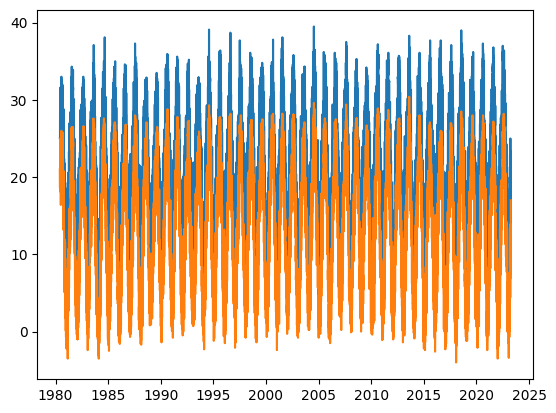

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df["temp_hi"])
plt.plot(df["temp_lo"])

短周期での変動が大きすぎて、よく分かりません。

それに対して、1981年から2022年まで、年ごとに日別の最高気温、最低気温の平均を取ると次のようになります。(1980年と2023年のデータは完全ではないので除外しています。)

In [ ]:
df["temp_hi"].resample("Y").mean().loc["1981":"2022"]

date
1981-12-31    18.867945
1982-12-31    19.602740
1983-12-31    19.521918
1984-12-31    18.730874
1985-12-31    19.367123
1986-12-31    18.767123
1987-12-31    20.029315
1988-12-31    19.012295
1989-12-31    19.916438
1990-12-31    20.631507
1991-12-31    19.891233
1992-12-31    19.622951
1993-12-31    19.067397
1994-12-31    20.585479
1995-12-31    20.146027
1996-12-31    19.755738
1997-12-31    20.645205
1998-12-31    20.526575
1999-12-31    20.881918
2000-12-31    20.667760
2001-12-31    20.432603
2002-12-31    20.560548
2003-12-31    19.686849
2004-12-31    21.288798
2005-12-31    20.039726
2006-12-31    19.943014
2007-12-31    20.724658
2008-12-31    20.113934
2009-12-31    20.266575
2010-12-31    20.743288
2011-12-31    20.289863
2012-12-31    20.066120
2013-12-31    21.067397
2014-12-31    20.571233
2015-12-31    20.849315
2016-12-31    20.908470
2017-12-31    20.413425
2018-12-31    21.251233
2019-12-31    20.943014
2020-12-31    21.050546
2021-12-31    21.378356
2022-12-31 

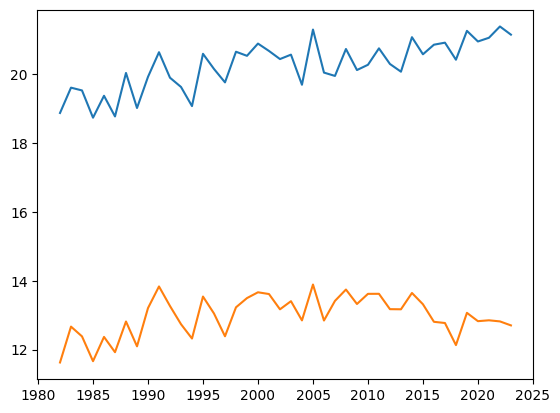

In [ ]:
# 最高気温、最低気温の年平均を取り、プロット
plt.plot(df.loc["1981":"2022",["temp_hi","temp_lo"]].resample("Y").mean())

最高気温に関しては、非常に顕著な上昇傾向が見られます。

ちなみに、この例では年ごとの集計を取ってそのままプロットしてしまいましたが、実は、`plt.plot()`に引数で渡している部分、すなわち、
```
df.loc["1981":"2022",["temp_hi","temp_lo"]].resample("Y").mean()
```
は、新しいデータフレームになっています。
また、データフレームには`plot()`メソッドが用意されていて、`plt.plot()`のラッパーとなっています。


,temp_hi,temp_lo
date,,
1981-12-31,18.867945,11.626027
1982-12-31,19.602740,12.666849
1983-12-31,19.521918,12.383288
1984-12-31,18.730874,11.663388
1985-12-31,19.367123,12.367945


<Axes: xlabel='date'>

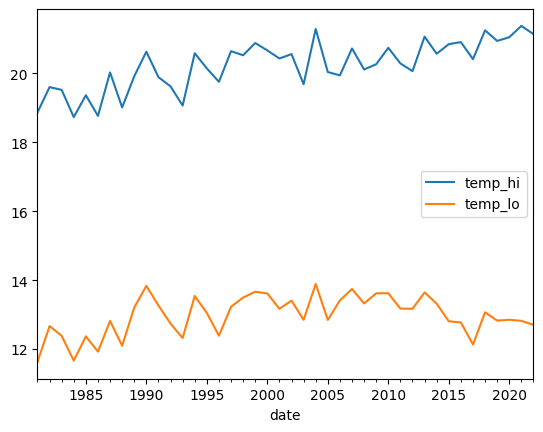

In [ ]:
# 月毎の最高気温、最低気温のデータフレーム
dfmon = df.loc["1981":"2022",["temp_hi","temp_lo"]].resample("Y").mean()
display(dfmon.head(5))
# plot()メソッドでグラフを描く
dfmon.plot()

**(練習)** 1981年から2022年までの年ごとの年間降水量を求めてプロットしてみてください。

`resample()`メソッドと、前述したデータの選択方法を組み合わせれば、色々な統計調査が可能になります。

**(例題)** 各年ごとの猛暑日(最高気温が35度以上の日)の日数を求めてください。

**(解答例)** いくつかやり方はありますが、まず、全ての日についてその日が35度以上かどうかのBoolean index を作り、それを「年」でリサンプルして合計を取る(Trueが1, Falseが0として型変換される)という方法が考えられます。

In [ ]:
(df["temp_hi"]>=35.0).resample("Y").sum()

date
1980-12-31     0
1981-12-31     0
1982-12-31     0
1983-12-31     2
1984-12-31     3
1985-12-31     1
1986-12-31     0
1987-12-31     3
1988-12-31     0
1989-12-31     0
1990-12-31     2
1991-12-31     4
1992-12-31     2
1993-12-31     0
1994-12-31     8
1995-12-31    13
1996-12-31     2
1997-12-31     3
1998-12-31     3
1999-12-31     0
2000-12-31     1
2001-12-31     8
2002-12-31     6
2003-12-31     0
2004-12-31     6
2005-12-31     4
2006-12-31     3
2007-12-31     7
2008-12-31     1
2009-12-31     0
2010-12-31    13
2011-12-31     4
2012-12-31     6
2013-12-31    12
2014-12-31     5
2015-12-31    11
2016-12-31     3
2017-12-31     2
2018-12-31    12
2019-12-31    12
2020-12-31    12
2021-12-31     2
2022-12-31    16
2023-12-31     0
Freq: A-DEC, Name: temp_hi, dtype: int64

こうやって見ると、昨年(2022年)は、やはり飛び抜けて暑い年だったのですね。。

**(練習問題)** 月間降水量が多かった年月を上位10位まで求めてください。

In [ ]:
df["rain"].resample("M").sum().sort_values(ascending=False).head(10)

date
2004-10-31    780.0
1991-10-31    533.0
2017-10-31    531.5
2019-10-31    529.5
2015-09-30    503.5
1991-09-30    445.5
2013-10-31    440.0
2010-09-30    428.0
2016-08-31    414.0
1993-08-31    412.0
Name: rain, dtype: float64

**(練習問題)** 7月の総日照時間の上位および下位それぞれ5年求めてください。

**(ヒント)** データフレームのインデクスが日時になっているとき、`df.index.month`で「月」を1から12の数で参照することができます。

# おわりに

Pandasは非常に多機能なデータ操作ライブラリであり、本格的なデータ解析や機械学習を行う前の「前処理」で大きな威力を発揮します。
今回は基本的なことしか紹介できませんでしたが、大きなデータセットを扱う機会があったら是非使ってみてください。
